# The Impact Of Climate Change On Birds

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import fiona
import seaborn as sns
from matplotlib import pyplot as plt
from shapely.geometry import polygon
%matplotlib inline

# Reading The Data

In [36]:
len(os.listdir('./bird-species/'))
#I downloaded 15 bird species data as an example

15

In [3]:
bbw_duck = gpd.read_file('./bird-species/E00021500_black_bellied_whistling_duck.gdb/')
bbw_duck

value  Shape_Length    Shape_Area  \
0    1.0     5540000.0  1.488000e+11   

                                            geometry  
0  MULTIPOLYGON (((-124911.231 -1575519.546, -114...

In [4]:
bbw_duck.columns

Index(['value', 'Shape_Length', 'Shape_Area', 'geometry'], dtype='object')

<AxesSubplot: >

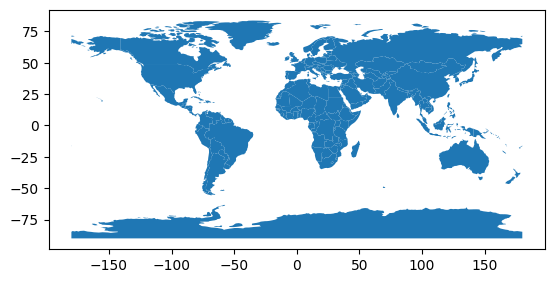

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

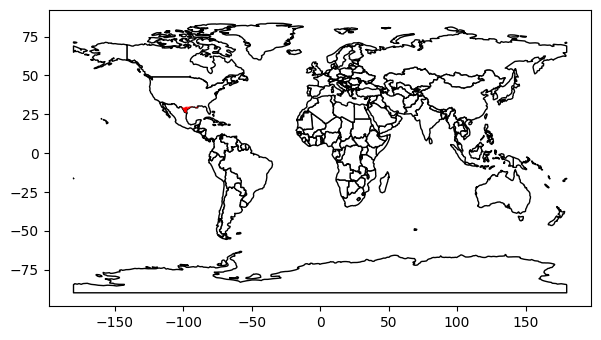

In [37]:

#making sure the coordinates line up:
bbw_duck= bbw_duck.to_crs(world.crs)

#establishing figure axes
base= world.plot(color='white', edgecolor='black',figsize=(7,15))

bbw_duck.plot(ax=base, color='red');

# Examining Map Layers

C:\Users\Eylül Dalkıran\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Eylül Dalkıran\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Eylül Dalkıran\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<co

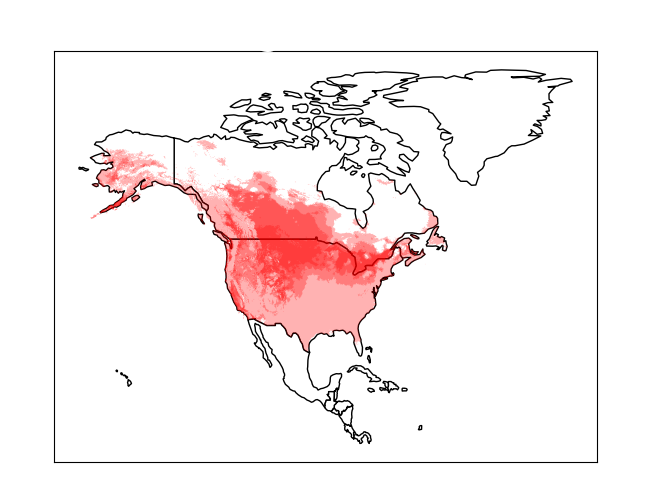

In [7]:
# geopandas included map, filtered to just North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
westhem = world[(world['continent'] == 'North America')]
base = westhem.plot(color='white', edgecolor='black', figsize=(7,7))

# mapping all the layers for a single species, mainly to test mapping with layer sorting
plt.title("Mallard Range and Predictions",fontsize=30,color='white')
plt.axis('tight')
plt.xticks([])
plt.yticks([])
layers = fiona.listlayers('./bird-species/E00039600_mallard.gdb')

# for this species, these are the layers will use future stages.
for l in [0,2,5,8]:
    mallard = gpd.read_file('./bird-species/E00039600_mallard.gdb', layer=layers[l])
    mallard = mallard.to_crs({'init': 'epsg:4326'})
    mallard.plot(ax=base, color='red', alpha=.3)


In [38]:
layers = fiona.listlayers('./bird-species/E00021700_fulvous_whistling_duck.gdb/')
fw_duck = gpd.GeoDataFrame()
for l in [0,2,5,8]:
    row = gpd.read_file('./bird-species/E00021700_fulvous_whistling_duck.gdb/',
                        layer=layers[l])
    fw_duck = gpd.GeoDataFrame(pd.concat([fw_duck,row], ignore_index=True))
fw_duck

value  Shape_Length    Shape_Area  \
0    1.0     4040000.0  3.230000e+10   
1    NaN     6280000.0  8.670000e+10   
2    NaN     9460000.0  1.395000e+11   
3    NaN    19080000.0  3.134000e+11   

                                            geometry SP_ID  FUWD_2020_  \
0  MULTIPOLYGON (((-194911.231 -1615519.546, -184...   NaN         NaN   
1  MULTIPOLYGON (((-194911.231 -1615519.546, -184...     1         1.0   
2  MULTIPOLYGON (((-194911.231 -1615519.546, -184...     1         NaN   
3  MULTIPOLYGON (((-124911.231 -1575519.546, -114...     1         NaN   

   FUWD_2050_  FUWD_2080_  
0         NaN         NaN  
1         NaN         NaN  
2         1.0         NaN  
3         NaN         1.0

In [10]:
layers

['E00021700_fuwduc_2000_suitability_kappa_BBS',
 'E00021700_fuwduc_2020_A1B_suitability_kappa_BBS',
 'E00021700_fuwduc_2020_A2_suitability_kappa_BBS',
 'E00021700_fuwduc_2020_B2_suitability_kappa_BBS',
 'E00021700_fuwduc_2050_A1B_suitability_kappa_BBS',
 'E00021700_fuwduc_2050_A2_suitability_kappa_BBS',
 'E00021700_fuwduc_2050_B2_suitability_kappa_BBS',
 'E00021700_fuwduc_2080_A1B_suitability_kappa_BBS',
 'E00021700_fuwduc_2080_A2_suitability_kappa_BBS',
 'E00021700_fuwduc_2080_B2_suitability_kappa_BBS',
 'E00021700_fuwduc_FUWD_2000_suitability_BBS',
 'E00021700_fuwduc_FUWD_2000_suitability_CBC',
 'E00021700_fuwduc_FUWD_2000_suitability_kappa_BBS',
 'E00021700_fuwduc_FUWD_2000_suitability_kappa_CBC',
 'E00021700_fuwduc_FUWD_2020_A1B_suitability_BBS',
 'E00021700_fuwduc_FUWD_2020_A1B_suitability_CBC',
 'E00021700_fuwduc_FUWD_2020_A1B_suitability_kappa_BBS',
 'E00021700_fuwduc_FUWD_2020_A1B_suitability_kappa_CBC',
 'E00021700_fuwduc_FUWD_2020_A2_suitability_BBS',
 'E00021700_fuwduc_FUWD_

# Establishing Layers

Look at the A2 emissions scenario.

In [11]:
keep_layers = [
    '2000_suitability_kappa_BBS',
    '2020_A2_suitability_kappa_BBS',
    '2050_A2_suitability_kappa_BBS',
    '2080_A2_suitability_kappa_BBS',
    '2000_suitability_kappa_CBC',
    '2020_A2_suitability_kappa_CBC',
    '2050_A2_suitability_kappa_CBC',
    '2080_A2_suitability_kappa_CBC'
]

# Reading and Formatting the Data

In [12]:
# establishing our coordinates from the base data
mapcrs = gpd.read_file('./bird-species/E00028800_cackling_canada_goose.gdb/').crs

In [13]:
# checking that the crs is the same across all base data
print(gpd.read_file('./bird-species/E00028800_cackling_canada_goose.gdb/').crs)
print(gpd.read_file('./bird-species/E00079600_gambels_quail.gdb/').crs)
print(gpd.read_file('./bird-species/E00051600_king_eider.gdb/').crs)

PROJCS["Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",20],PARAMETER["standard_parallel_2",60],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",20],PARAMETER["standard_parallel_2",60],PARAMETER["false_easting",0],PARAMETER["false_northing",0],

In [14]:
# reading our data files into an iterable dictionary
study_list = {
    'summer_00':gpd.GeoDataFrame.from_file('./birds-dataaa/2000_suitability_kappa_BBS/'),
    'winter_00':gpd.GeoDataFrame.from_file('./birds-dataaa/2000_suitability_kappa_CBC/'),
    'summer_20':gpd.GeoDataFrame.from_file('./birds-dataaa/2020_A2_suitability_kappa_BBS/'),
    'winter_20':gpd.GeoDataFrame.from_file('./birds-dataaa/2020_A2_suitability_kappa_CBC/'),
    'summer_50':gpd.GeoDataFrame.from_file('./birds-dataaa/2050_A2_suitability_kappa_BBS/'),
    'winter_50':gpd.GeoDataFrame.from_file('./birds-dataaa/2050_A2_suitability_kappa_CBC/'),
    'summer_80':gpd.GeoDataFrame.from_file('./birds-dataaa/2080_A2_suitability_kappa_BBS/'),
    'winter_80':gpd.GeoDataFrame.from_file('./birds-dataaa/2080_A2_suitability_kappa_CBC/')
}

In [15]:
# making sure everything's there
study_list.keys()

dict_keys(['summer_00', 'winter_00', 'summer_20', 'winter_20', 'summer_50', 'winter_50', 'summer_80', 'winter_80'])

In [16]:
# setting the coordinates to those of the base bird species data
for gdf in study_list.values():
    gdf.crs = {'proj': 'aea',
 'lat_1': 20,
 'lat_2': 60,
 'lat_0': 40,
 'lon_0': -96,
 'x_0': 0,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'm',
 'no_defs': True}

# EDA

Ensuring that the GeoDataFrames are formatted correctly and that the polygons can map normally.

In [17]:
# looking at the data
study_list['summer_00'].head()

value   Shape_Leng    Shape_Area  \
0    1.0    5500000.0  7.410000e+10   
1    1.0  121380000.0  2.459500e+12   
2    1.0  103120000.0  2.774100e+12   
3    1.0   15100000.0  1.159300e+12   
4    1.0    1640000.0  1.120000e+10   

                                            geometry  
0  MULTIPOLYGON (((-1844911.231 -655519.546, -184...  
1  MULTIPOLYGON (((-834911.231 -705519.546, -8249...  
2  MULTIPOLYGON (((-1854911.231 2274480.454, -184...  
3  MULTIPOLYGON (((335088.769 -1165519.546, 34508...  
4  MULTIPOLYGON (((1755088.769 -1555519.546, 1765...

<AxesSubplot: >

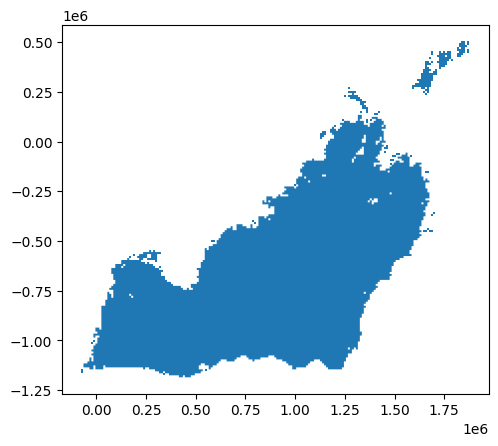

In [18]:
# example of one of our polygons
gpd.GeoDataFrame(study_list['summer_00'].loc[[3]]).plot()


Testing Aggregate Map Workflow
Iterating over manually-drawn polygon "pixels" in a very coarse map for one of my imported GeoDataFrames. Then I can scale these steps to more useful maps depicting how many species live in the different areas in North America

In [19]:
# to iterate over the relevant map area, I'll have the find the highest and lowest
# lattitude and longitude values for the whole dataframe (-4.164911e+06)
sorted_sum00 = study_list['summer_00'].bounds.sort_values('minx',ascending=True)['minx']
minx = sorted_sum00.reset_index(drop=True)[0]

sorted_sum00 = study_list['summer_00'].bounds.sort_values('maxx',ascending=False)['maxx']
maxx = sorted_sum00.reset_index(drop=True)[0]

sorted_sum00 = study_list['summer_00'].bounds.sort_values('miny',ascending=True)['miny']
miny = sorted_sum00.reset_index(drop=True)[0]

sorted_sum00 = study_list['summer_00'].bounds.sort_values('maxy',ascending=False)['maxy']
maxy = sorted_sum00.reset_index(drop=True)[0]

[(minx,maxx),(miny,maxy)]

[(-4164911.2311000004, 2995088.7688999996),
 (-1645519.5456999997, 4514480.454299999)]

In [20]:
# testing with big pixels
xpoints = np.linspace(minx,maxx,num=12)
ypoints = np.linspace(miny,maxy,num=12)

big_pix = []
for x in range(len(xpoints)-1):
    for y in range(len(ypoints)-1):
        big_pix.append(polygon.Polygon([(xpoints[x],ypoints[y]),
                                       (xpoints[x+1],ypoints[y]),
                                       (xpoints[x+1],ypoints[y+1]),
                                       (xpoints[x],ypoints[y+1])]))
        if ((x + y) % 10 == 0):
            print(f'building pixel at ({x},{y})')
        
big_pix = gpd.GeoDataFrame(geometry = big_pix,crs=mapcrs)
big_pix['count'] = 0
big_pix.head()

building pixel at (0,0)
building pixel at (0,10)
building pixel at (1,9)
building pixel at (2,8)
building pixel at (3,7)
building pixel at (4,6)
building pixel at (5,5)
building pixel at (6,4)
building pixel at (7,3)
building pixel at (8,2)
building pixel at (9,1)
building pixel at (10,0)
building pixel at (10,10)


geometry  count
0  POLYGON ((-4164911.231 -1645519.546, -3514002....      0
1  POLYGON ((-4164911.231 -1085519.546, -3514002....      0
2  POLYGON ((-4164911.231 -525519.546, -3514002.1...      0
3  POLYGON ((-4164911.231 34480.454, -3514002.140...      0
4  POLYGON ((-4164911.231 594480.454, -3514002.14...      0

<AxesSubplot: >

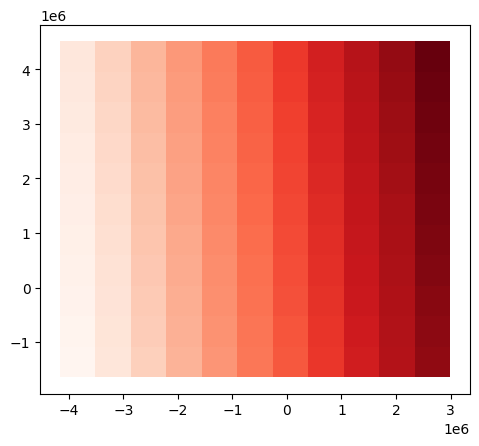

In [21]:
# making sure our pixels cover an area
big_pix.plot(cmap='Reds')

<AxesSubplot: >

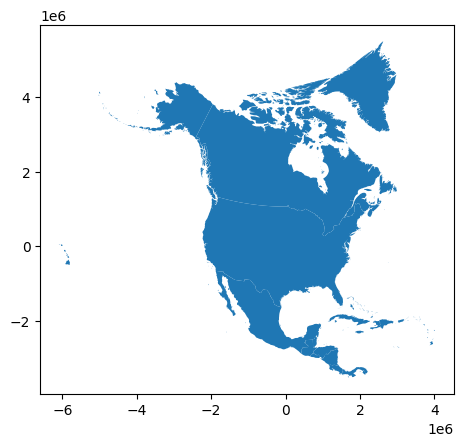

In [22]:
# Here using a map I pulled in from another source https://geojson-maps.ash.ms/
northam = gpd.read_file('./NorthAm.json')
northam = northam.to_crs(mapcrs)
northam.plot()

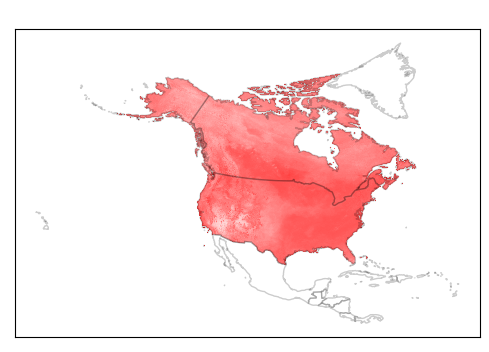

In [23]:
# Mapping the species overlap of the 2000 BBS somewhat hollistically, using 'alpha'

fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(6,4))

study_list['summer_00'].plot(ax=ax,color='red',alpha=.02);
northam.plot(ax=ax,color='white', edgecolor='black',alpha=0.2);
plt.title('All Species\' Range Overlaps, Summer 2000',fontsize=10,color='white');
plt.axis('tight');
plt.xticks([]);
plt.yticks([]);
plt.show();

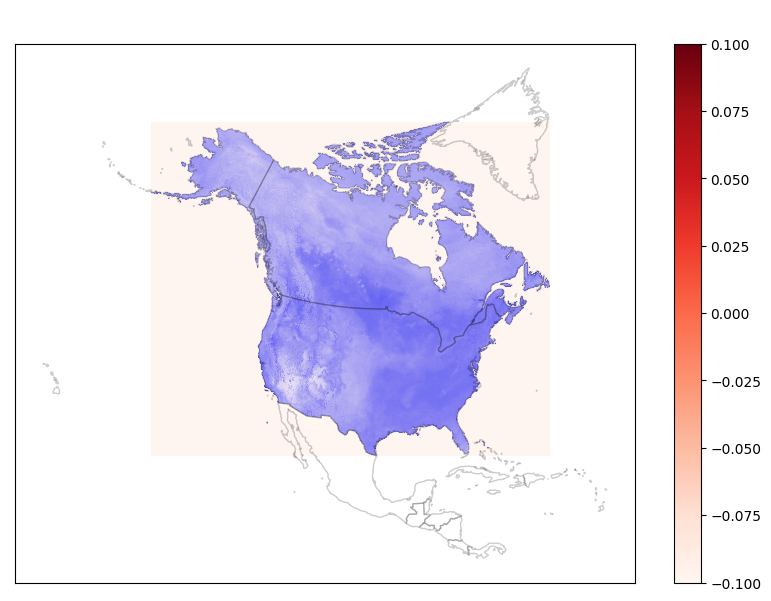

In [26]:
# and finally checking test map 
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,7))

big_pix.plot(ax=ax,cmap='Reds',column='count',legend=True);

study_list['summer_00'].plot(ax=ax,color='blue',alpha=.01);
northam.plot(ax=ax,color='white', edgecolor='black',alpha=0.2);
plt.axis('tight');
plt.xticks([]);
plt.yticks([]);
plt.title('Species Range Count Overlapped',color='white',fontsize=24);
plt.show();

In [27]:
raster_dic = {
    'sum_00' : gpd.read_file('./birds-dataaa/summer_00_agg/'),
    'win_00' : gpd.read_file('./birds-dataaa/winter_00_agg/'),
    'sum_20' : gpd.read_file('./birds-dataaa/summer_20_agg/'),
    'win_20' : gpd.read_file('./birds-dataaa/winter_20_agg/'),
    'sum_50' : gpd.read_file('./birds-dataaa/summer_50_agg/'),
    'win_50' : gpd.read_file('./birds-dataaa/winter_50_agg/'),
    'sum_80' : gpd.read_file('./birds-dataaa/summer_80_agg/'),
    'win_80' : gpd.read_file('./birds-dataaa/winter_80_agg/')
}

In [28]:
raster_dic['sum_00'].crs

<Derived Projected CRS: PROJCS["Albers",GEOGCS["NAD83",DATUM["North_Americ ...>
Name: Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
raster_dic['sum_00'].head()

count                                           geometry
0      0  POLYGON ((-4164911.231 -1645519.546, -4164911....
1      0  POLYGON ((-4164911.231 -1583297.323, -4164911....
2      0  POLYGON ((-4164911.231 -1521075.101, -4164911....
3      0  POLYGON ((-4164911.231 -1458852.879, -4164911....
4      0  POLYGON ((-4164911.231 -1396630.657, -4164911....

In [30]:
northam = gpd.read_file('./NorthAm.json')
northam = northam.to_crs(raster_dic['win_50'].crs)
northam.crs

<Derived Projected CRS: PROJCS["Albers",GEOGCS["NAD83",DATUM["North_Americ ...>
Name: Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

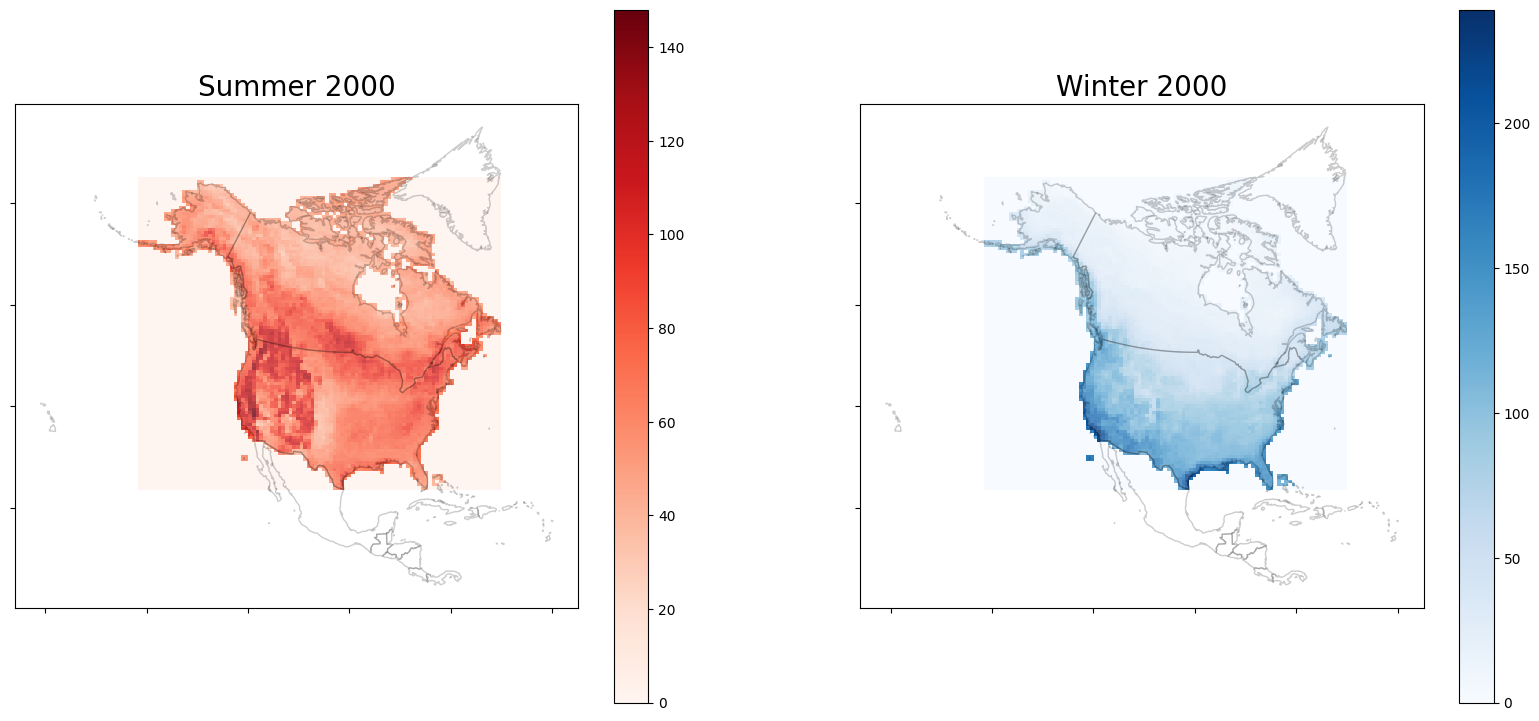

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))

raster_dic['sum_00'].plot(ax=ax1,cmap='Reds',column='count',legend=True)
northam.plot(ax=ax1,color='white', edgecolor='black',alpha=0.2);
ax1.set_title('Summer 2000',fontsize=20)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

raster_dic['win_00'].plot(ax=ax2,cmap='Blues',column='count',legend=True)
northam.plot(ax=ax2,color='white', edgecolor='black',alpha=0.2);
ax2.set_title('Winter 2000',fontsize=20)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.show();

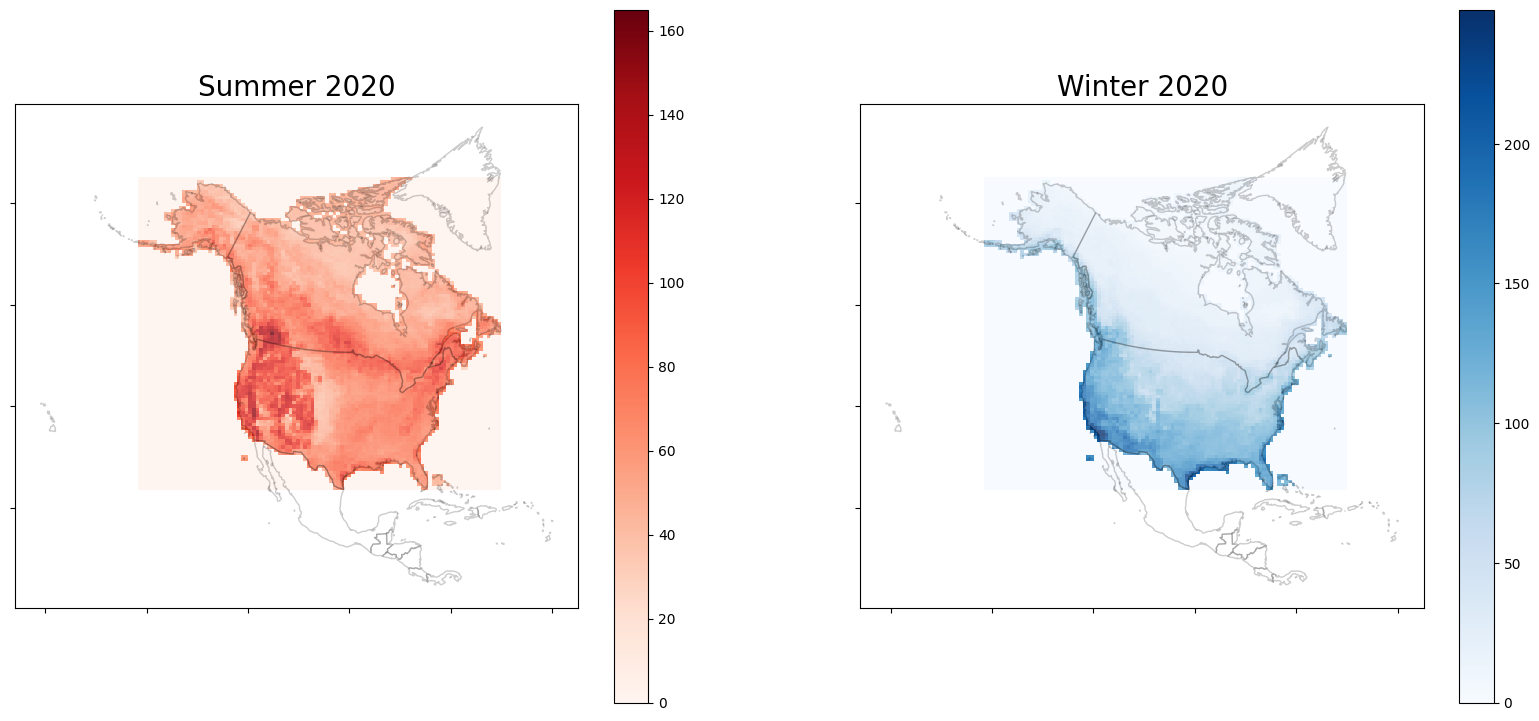

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))

raster_dic['sum_20'].plot(ax=ax1,cmap='Reds',column='count',legend=True)
northam.plot(ax=ax1,color='white', edgecolor='black',alpha=0.2);
ax1.set_title('Summer 2020',fontsize=20)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

raster_dic['win_20'].plot(ax=ax2,cmap='Blues',column='count',legend=True)
northam.plot(ax=ax2,color='white', edgecolor='black',alpha=0.2);
ax2.set_title('Winter 2020',fontsize=20)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.show();

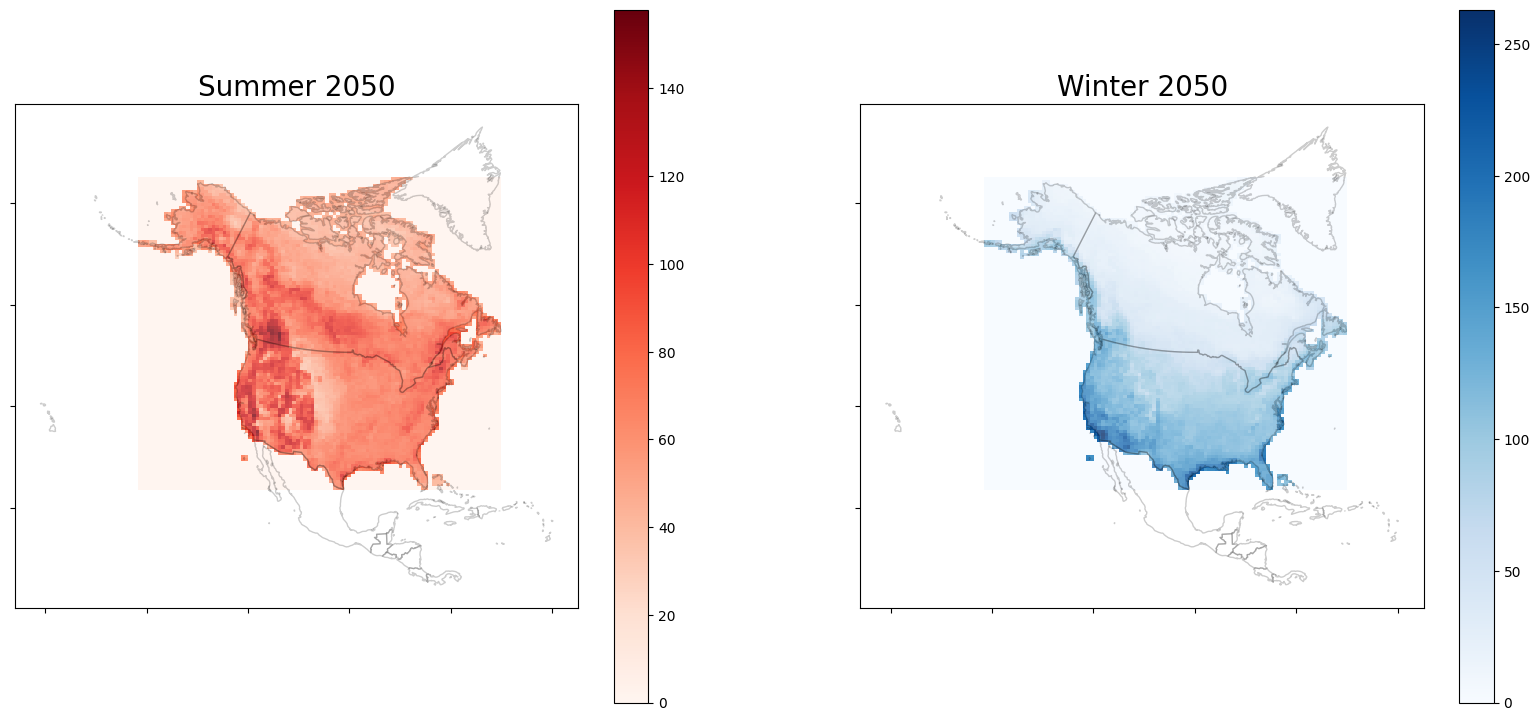

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))

raster_dic['sum_50'].plot(ax=ax1,cmap='Reds',column='count',legend=True)
northam.plot(ax=ax1,color='white', edgecolor='black',alpha=0.2);
ax1.set_title('Summer 2050',fontsize=20)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

raster_dic['win_50'].plot(ax=ax2,cmap='Blues',column='count',legend=True)
northam.plot(ax=ax2,color='white', edgecolor='black',alpha=0.2);
ax2.set_title('Winter 2050',fontsize=20)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.show();


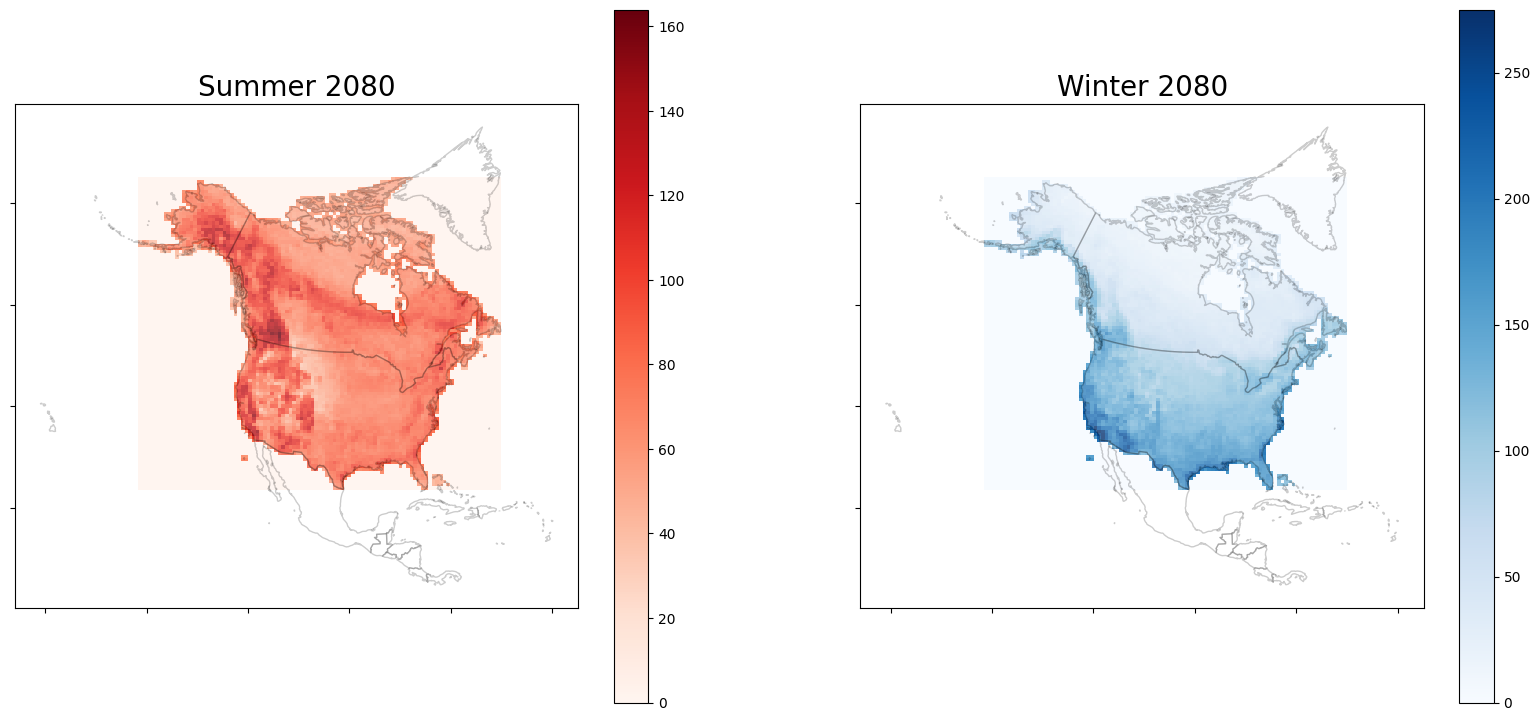

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))

raster_dic['sum_80'].plot(ax=ax1,cmap='Reds',column='count',legend=True)
northam.plot(ax=ax1,color='white', edgecolor='black',alpha=0.2);
ax1.set_title('Summer 2080',fontsize=20)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

raster_dic['win_80'].plot(ax=ax2,cmap='Blues',column='count',legend=True)
northam.plot(ax=ax2,color='white', edgecolor='black',alpha=0.2);
ax2.set_title('Winter 2080',fontsize=20)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.show();


As can be seen, we can expect large numbers of bird species near the mountain range to continue northward into the Coast Mountains and Alaska Range in the future. Differences in winter bird species are less pronounced, but there are greater numbers of bird species that can be observed inland from the coast than overall numbers available.

# SECOND DATASET

In [35]:
data_unprocessed = pd.read_csv('birddataset.csv')

In [4]:
bird_df=data_unprocessed.copy()

In [5]:
bird_df.species.head(20)

0     Hylophilus_ochraceiceps
1        Gymnopithys_rufigula
2           Turdus_albicollis
3          Formicarius_analis
4      Hylophylax_poecilinota
5            Pithys_albifrons
6     Deconychura_stictolaema
7           Myiobius_barbatus
8          Thalurania_furcata
9          Thalurania_furcata
10      Mionectes_macconnelli
11     Thamnomanes_ardesiacus
12         Formicarius_analis
13     Glyphorynchus_spirurus
14      Mionectes_macconnelli
15         Thalurania_furcata
16         Thalurania_furcata
17                Pipra_pipra
18     Platyrinchus_coronatus
19       Schiffornis_turdinus
Name: species, dtype: object

In [6]:
bird_df.head(10)

species guild stratum  spMeanMass  spMeanWing  spMeanMW  \
0  Hylophilus_ochraceiceps    UI      UN     10.0607     56.3663    0.1779   
1     Gymnopithys_rufigula   AAF      NG     28.9785     74.8910    0.3882   
2        Turdus_albicollis    UF      UN     48.8433    102.3205    0.4759   
3       Formicarius_analis    TI      TE     61.8459     90.3300    0.6846   
4   Hylophylax_poecilinota   NGI      NG     16.6830     63.6362    0.2622   
5         Pithys_albifrons   AAF      NG     20.1250     69.8291    0.2889   
6  Deconychura_stictolaema    WC      UN     16.7182     78.3903    0.2141   
7        Myiobius_barbatus    MI      MS     10.4659     61.8618    0.1691   
8       Thalurania_furcata    HB      MS      4.0815     50.4655    0.0804   
9       Thalurania_furcata    HB      MS      4.0815     50.4655    0.0804   

       bn  age age_group            timestamp  ...        mw  mass_scaled  \
0   20010  NaN   unknown  1979-10-17 16:00:00  ...       NaN          NaN   
1   40942  UPU   unknown  1980-06-05 06:30:00  ...       NaN     -0.33766   
2   40943  UCU   unknown  1980-06-05 07:10:00  ...       NaN     -0.58213   
3   40944  FAJ     adult  1980-06-05 07:25:00  ...       NaN          NaN   
4   30257  UCU   unknown  1980-06-05 07:25:00  ...       NaN     -1.00881   
5   30256  UPU   unknown  1980-06-05 07:25:00  ...       NaN      0.68323   
6   20505  UCU   unknown  1980-06-05 08:15:00  ...  0.235294      1.96301   
7   20506  FAJ     adult  1980-06-05 08:25:00  ...  0.185484      0.98807   
8  unkn94  FAJ   unknown  1980-06-05 09:25:00  ...  0.071429     -1.42472   
9  unkn95  FAJ   unknown  1980-06-05 09:25:00  ...  0.078431     -0.19968   

   wing_scaled  mw_scaled  temp_lag0_dry  temp_lag1_wet  temp_lag2_dry  \
0      0.46725        NaN         26.432         25.506         25.708   
1          NaN        NaN         25.919         26.162         26.432   
2          NaN        NaN         25.919         26.162         26.432   
3     -0.59006        NaN         25.919         26.162         26.432   
4          NaN        NaN         25.919         26.162         26.432   
5          NaN        NaN         25.919         26.162         26.432   
6      0.84318    0.98992         25.919         26.162         26.432   
7      0.02234    0.96889         25.919         26.162         26.432   
8     -0.29040   -1.11585         25.919         26.162         26.432   
9      0.10591   -0.24485         25.919         26.162         26.432   

   precip_lag0_dry  precip_lag1_wet  precip_lag2_dry  
0          941.847         1544.449          939.125  
1          960.083         1226.707          941.847  
2          960.083         1226.707          941.847  
3          960.083         1226.707          941.847  
4          960.083         1226.707          941.847  
5          960.083         1226.707          941.847  
6          960.083         1226.707          941.847  
7          960.083         1226.707          941.847  
8          960.083         1226.707          941.847  
9          960.083         1226.707          941.847  

[10 rows x 23 columns]

In [7]:
bird_df.isnull().sum()

species               0
guild                 0
stratum               0
spMeanMass            0
spMeanWing            0
spMeanMW              0
bn                    0
age                 400
age_group             0
timestamp             0
year                  0
mass                573
wing               3833
mw                 4406
mass_scaled         573
wing_scaled        3833
mw_scaled          4406
temp_lag0_dry         0
temp_lag1_wet         0
temp_lag2_dry         0
precip_lag0_dry       0
precip_lag1_wet       0
precip_lag2_dry       0
dtype: int64

In [8]:
bird_df_1=bird_df.dropna()

The dataset contains a few columns that we would not be using in our analysis so we would be removing them from the data frame to minimize the memory consumption and maximize the time efficiency of our analysis.

In [9]:
bird_df=bird_df.drop(["guild","stratum","bn","age","timestamp","age_group",
                     "mass_scaled", "wing_scaled", "mw_scaled", "temp_lag1_wet",
                     "precip_lag1_wet"],axis=1)

These are the columns remaining in the data frame that we would be using in our analysis:

species: scientific name of the bird

spMeanMass: mean mass for this species across this dataset

spMeanWing: mean wing for this species across this dataset

spMeanMW: mean of mass: wing ratio for this species across this dataset

year: year of capture

mass: bird mass (g)

wing: wing chord length (mm)

MW: ratio of mass and wing measurements, if both available

temp_lag0_dry: mean temperature (deg C) for the season of capture (dry season)

temp_lag2_dry: mean temperature (deg C) for previous year's dry season

precip_lag0_dry: total precipitation (mm) for the season of capture (dry season)

precip_lag2_dry: total precipitation (mm) for the previous year's dry season

# We will also need to introduce a primary key column that would help us with keeping track of each row individually. We will reset the index and rename it to 'ID'.

In [10]:
bird_df.dropna(inplace=True)
bird_df.reset_index(drop=True, inplace=True)
bird_df.index.name='ID'

In [11]:
bird_df.head(6)

species  spMeanMass  spMeanWing  spMeanMW  year  mass  \
ID                                                                          
0   Deconychura_stictolaema     16.7182     78.3903    0.2141  1980  20.0   
1         Myiobius_barbatus     10.4659     61.8618    0.1691  1980  11.5   
2        Thalurania_furcata      4.0815     50.4655    0.0804  1980   3.5   
3        Thalurania_furcata      4.0815     50.4655    0.0804  1980   4.0   
4     Mionectes_macconnelli     12.2338     62.9850    0.1947  1980  11.5   
5        Formicarius_analis     61.8459     90.3300    0.6846  1980  60.0   

    wing        mw  temp_lag0_dry  temp_lag2_dry  precip_lag0_dry  \
ID                                                                  
0   85.0  0.235294         25.919         26.432          960.083   
1   62.0  0.185484         25.919         26.432          960.083   
2   49.0  0.071429         25.919         26.432          960.083   
3   51.0  0.078431         25.919         26.432          960.083   
4   58.0  0.198276         25.919         26.432          960.083   
5   89.0  0.674157         25.919         26.432          960.083   

    precip_lag2_dry  
ID                   
0           941.847  
1           941.847  
2           941.847  
3           941.847  
4           941.847  
5           941.847

In [12]:
bird_df.to_csv("preprocessedbird_df.csv")

In [13]:
processed_df=pd.read_csv("preprocessedbird_df.csv")

# Data Analysis and Visualization

In [14]:
species_groupby = processed_df.groupby(["species","year"], as_index=False).mean()

Line charts of the types (depending on the mw variable). Changes in mass-wing lengths of species over time:

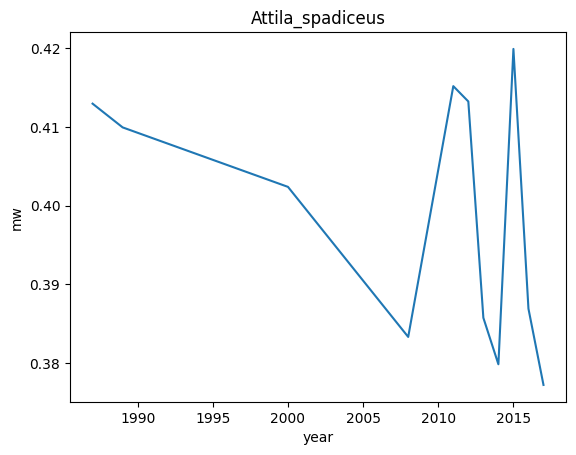

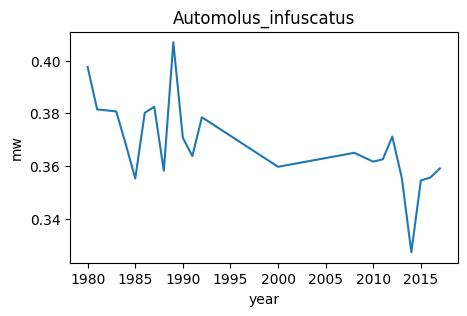

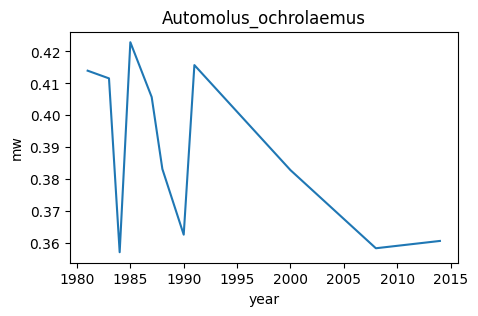

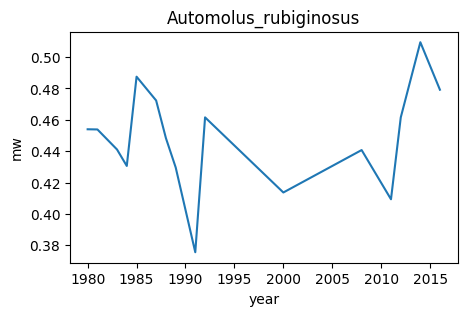

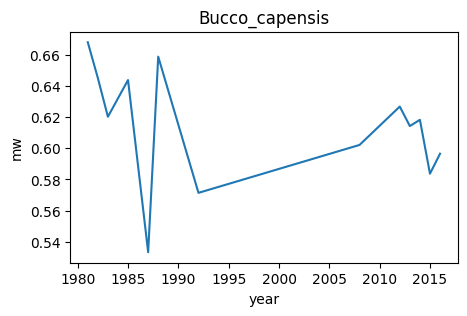

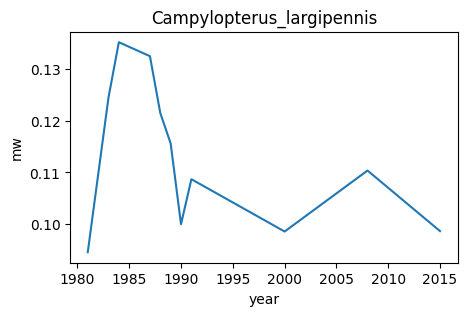

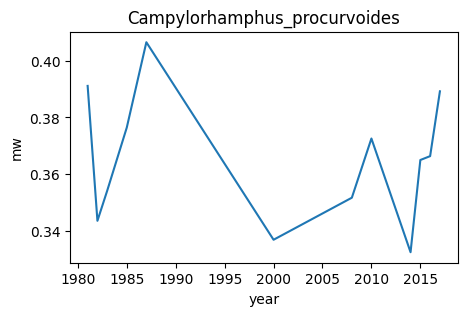

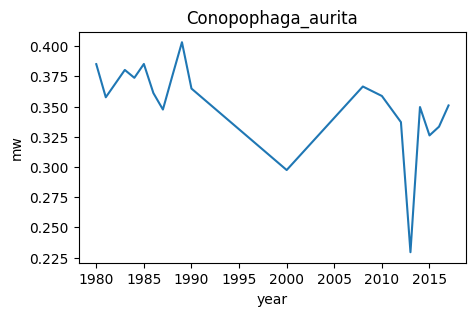

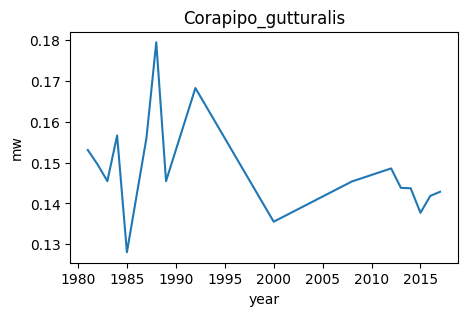

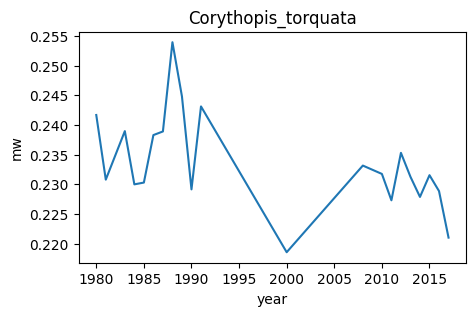

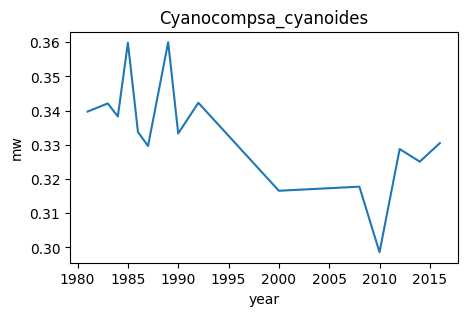

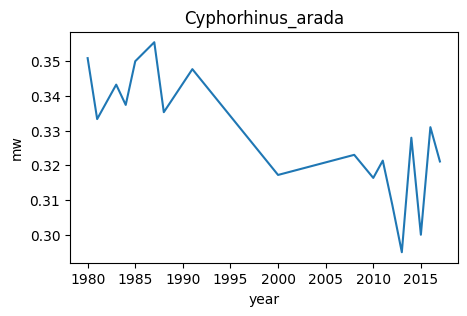

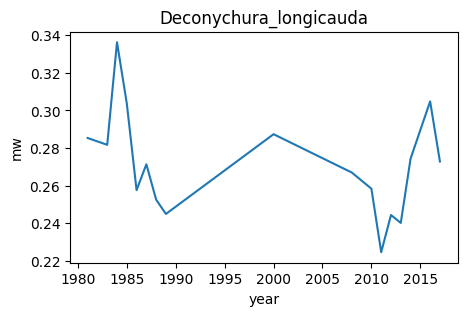

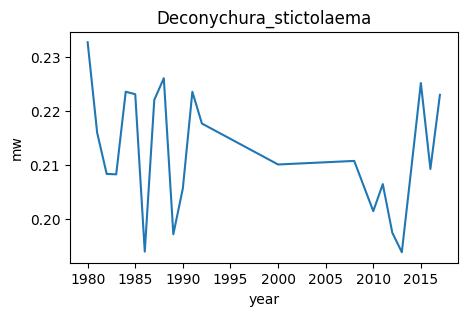

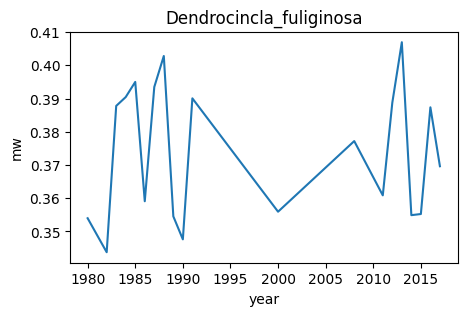

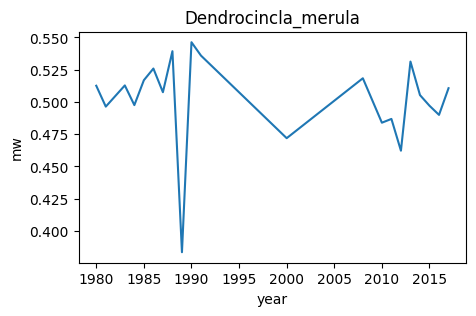

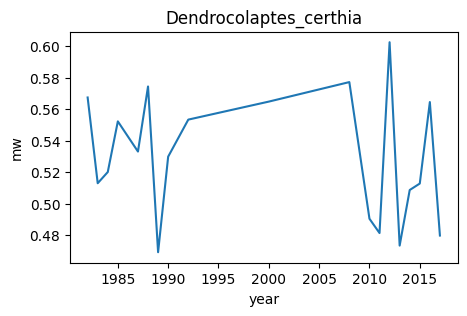

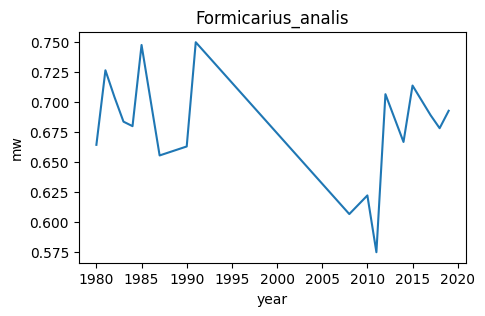

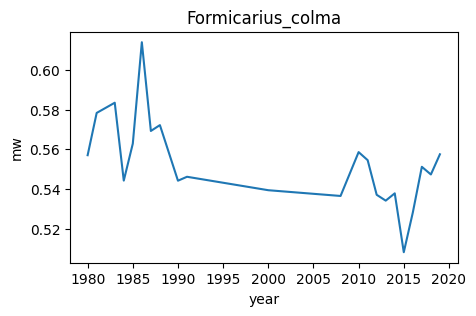

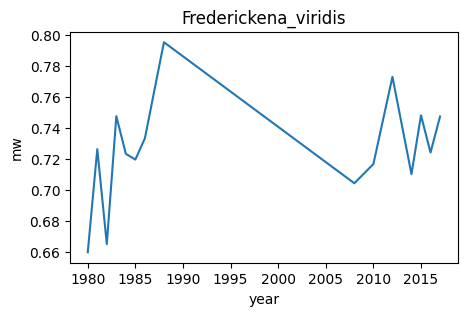

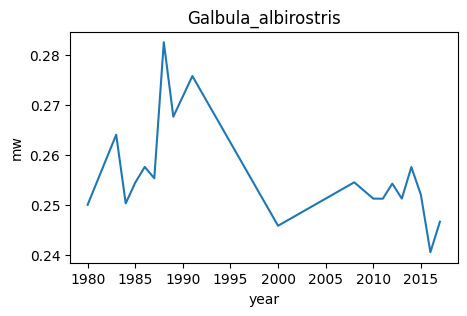

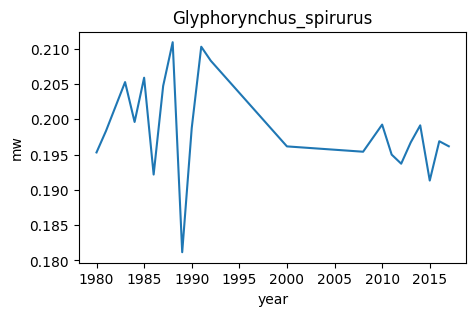

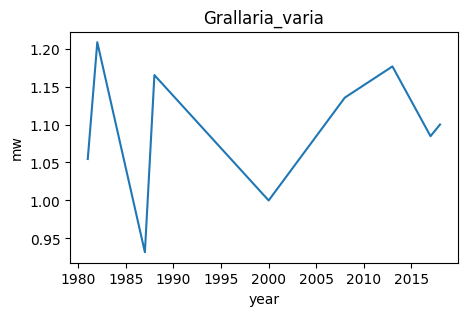

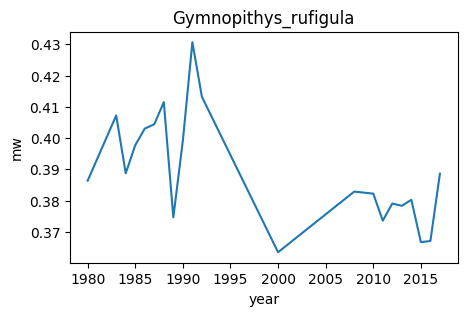

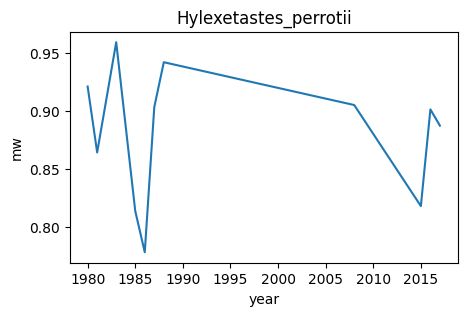

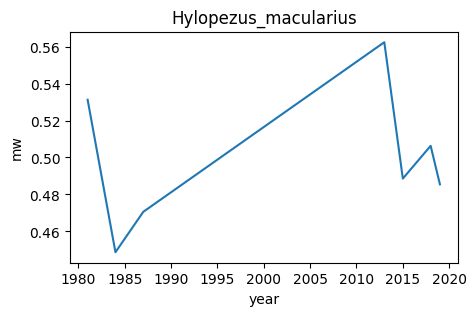

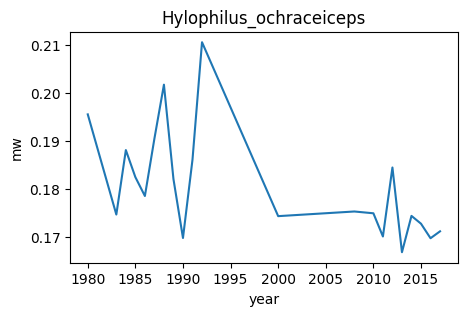

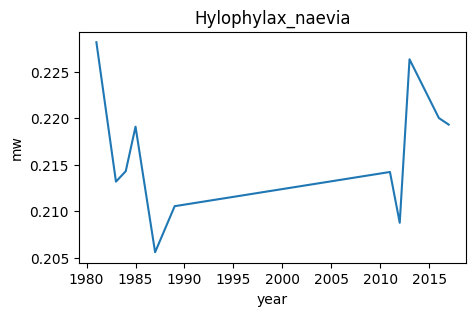

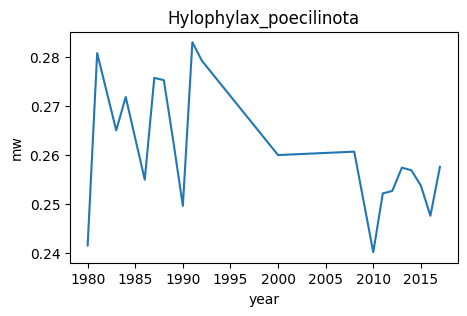

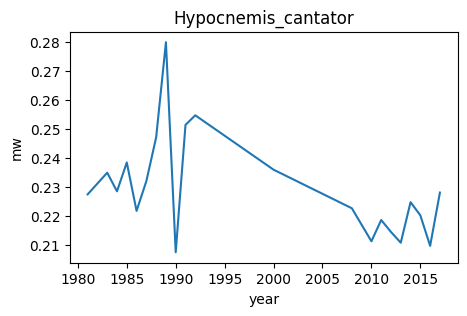

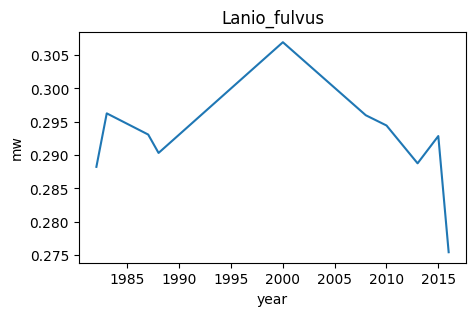

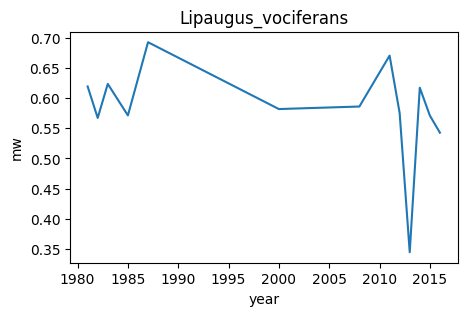

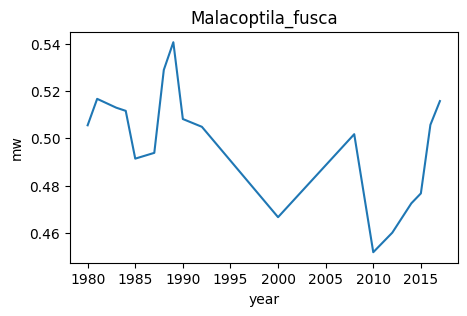

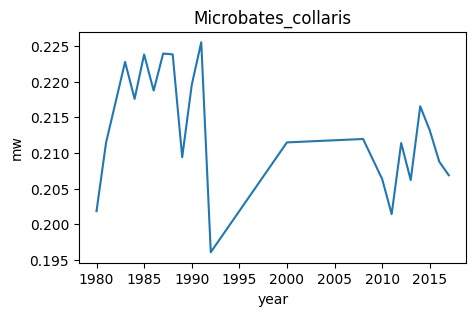

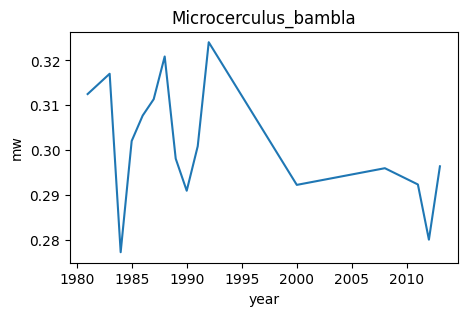

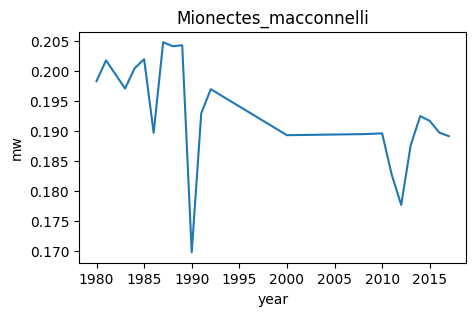

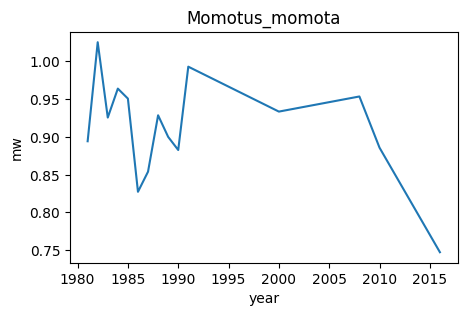

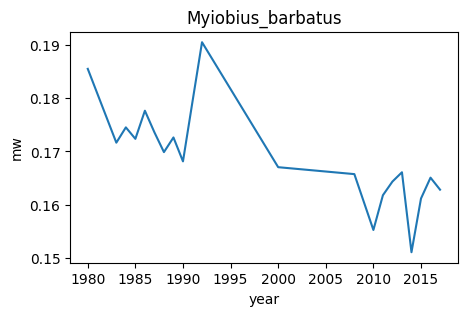

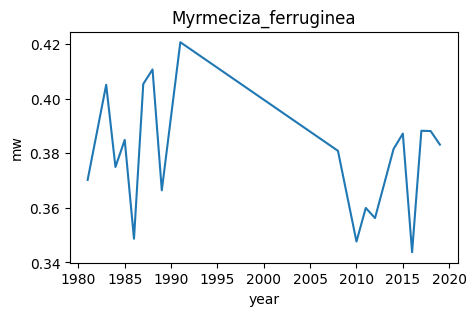

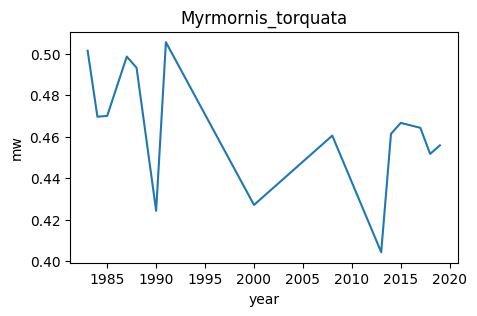

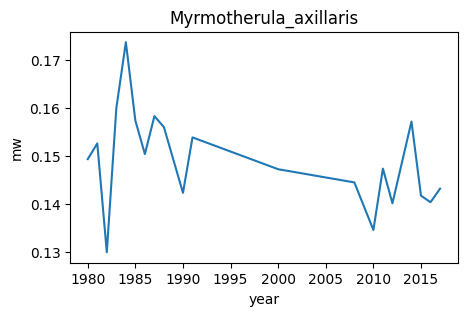

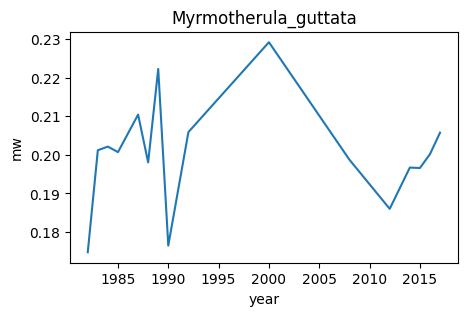

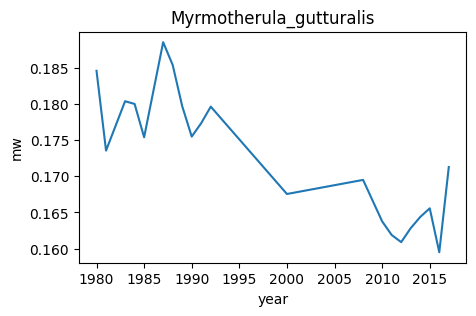

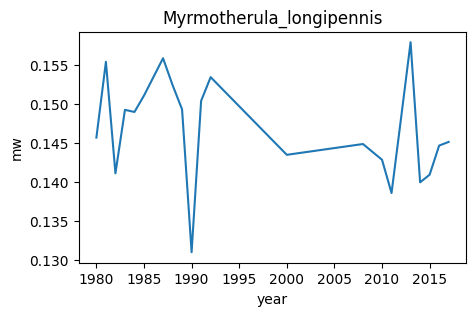

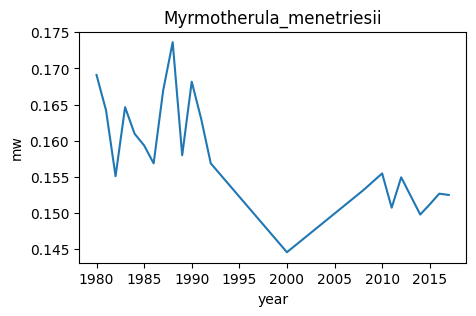

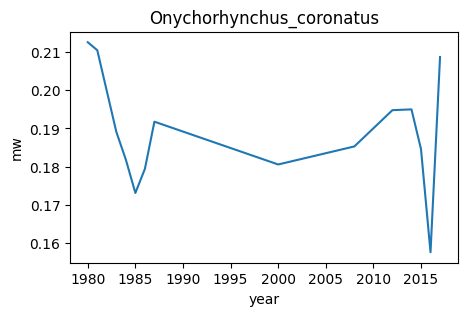

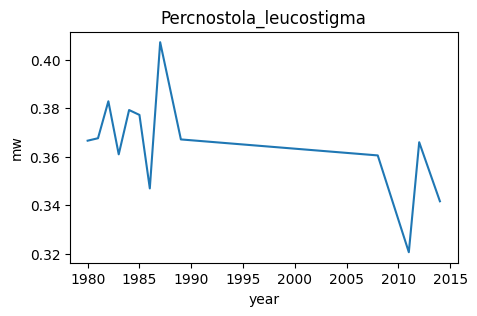

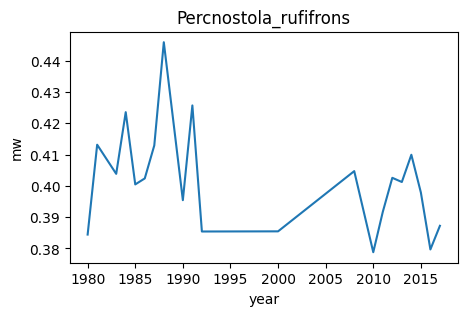

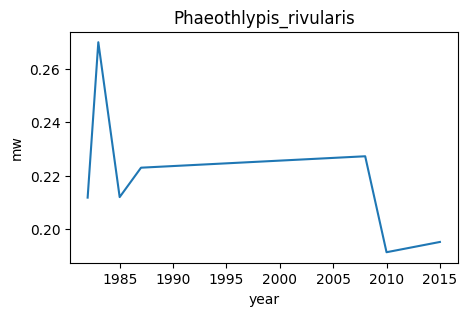

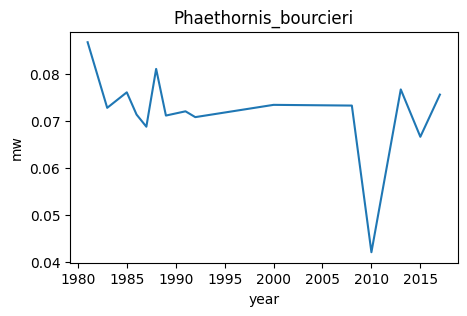

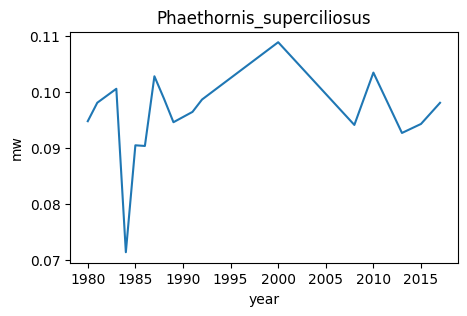

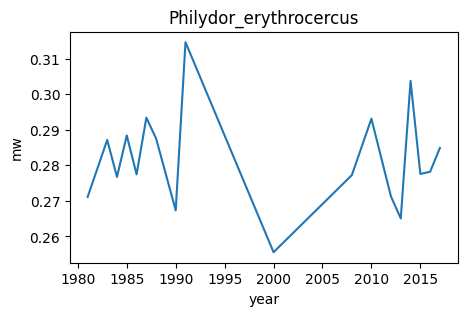

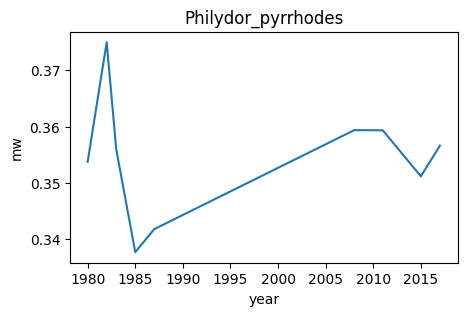

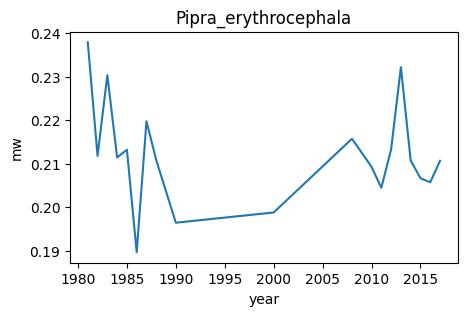

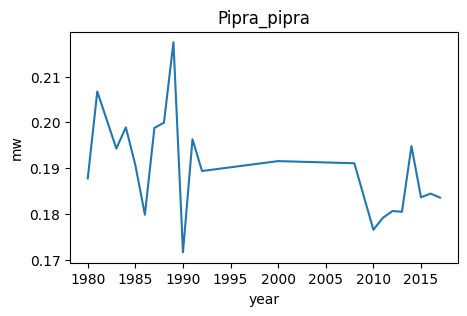

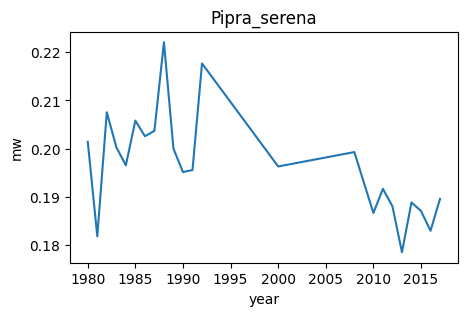

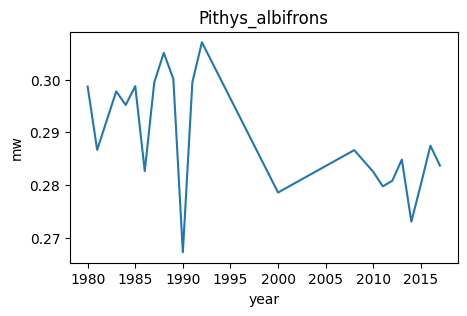

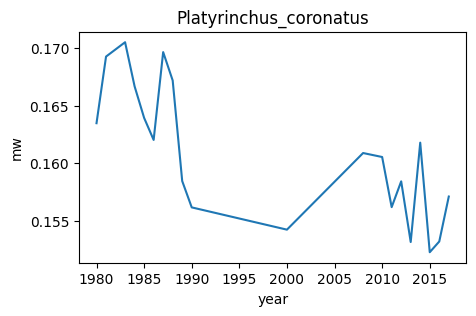

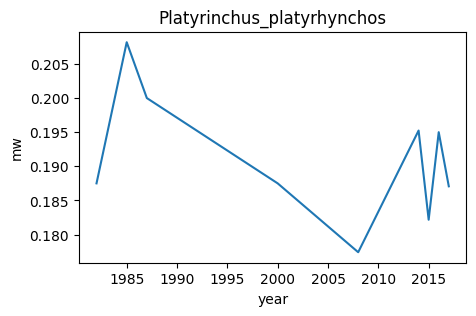

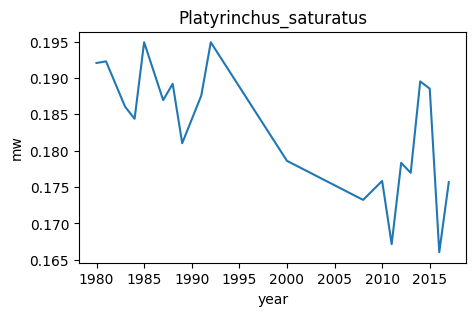

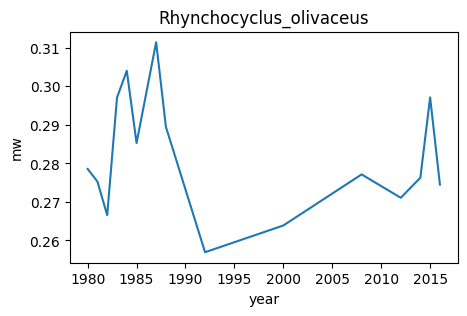

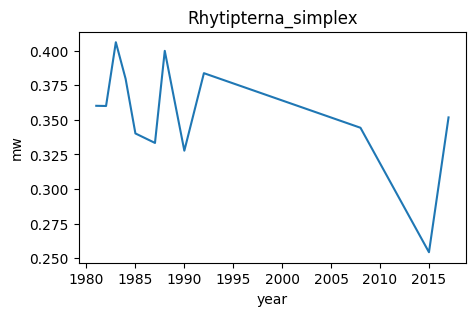

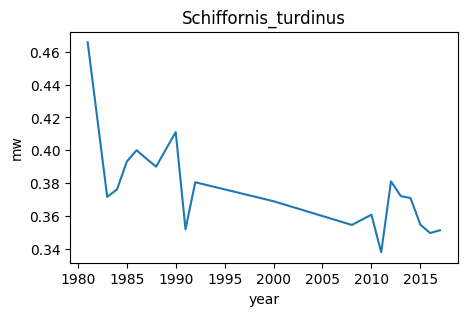

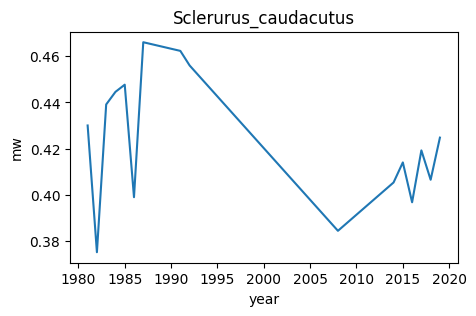

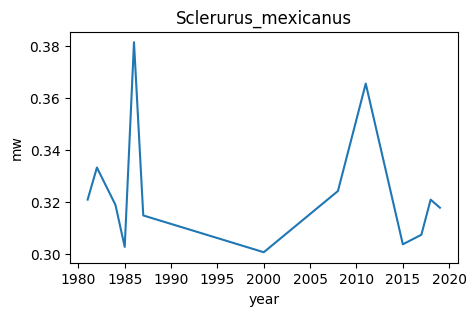

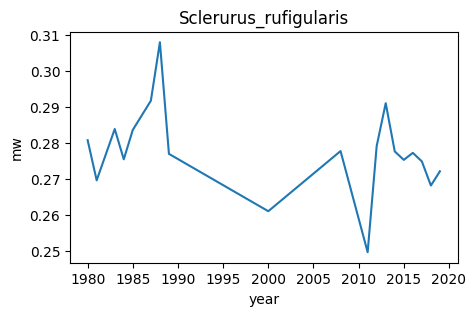

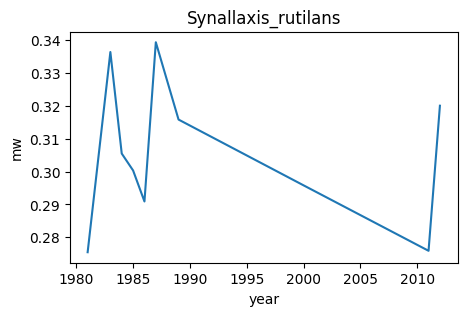

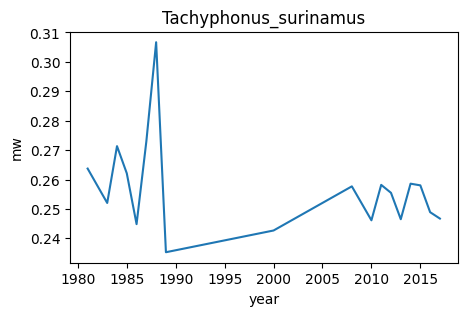

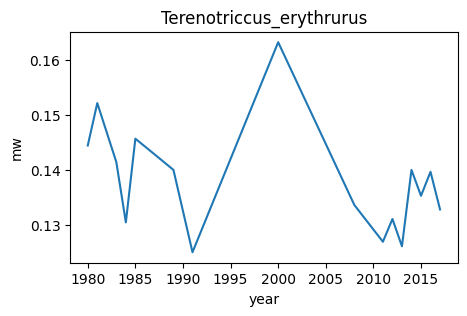

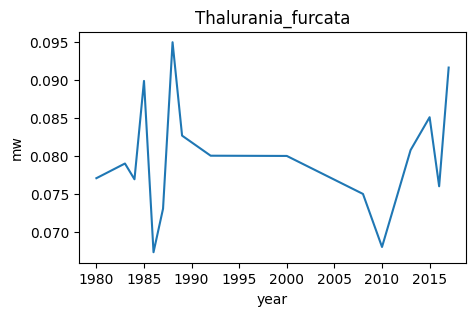

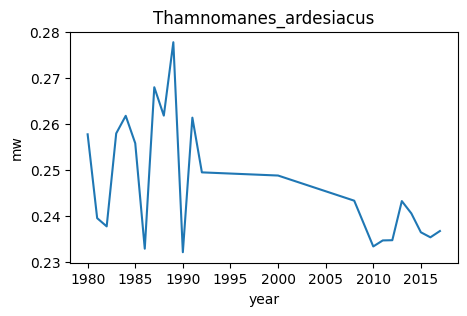

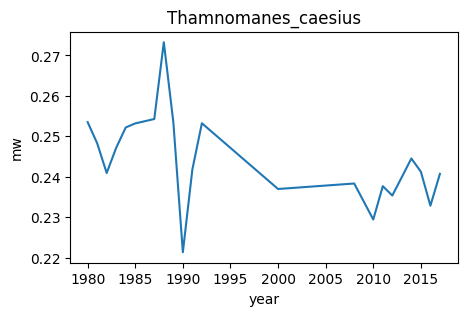

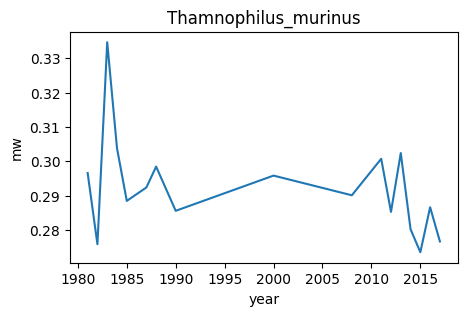

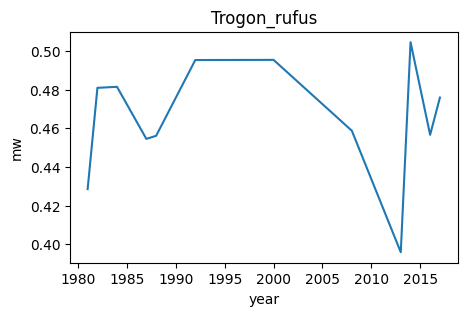

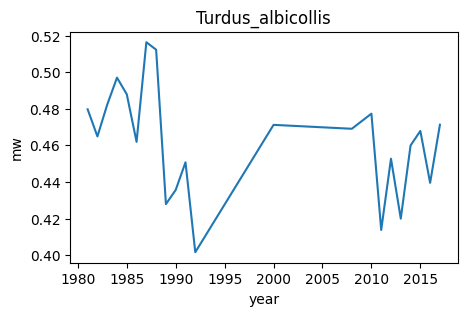

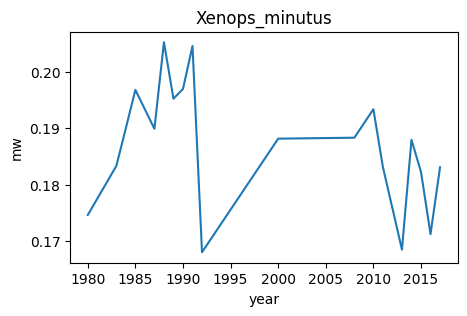

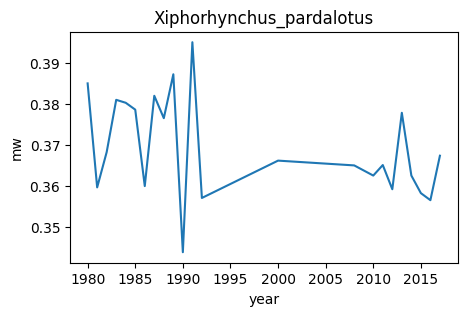

<Figure size 500x300 with 0 Axes>

In [17]:
species_list= species_groupby["species"].unique()
for i in range(len(species_list)):
    species_data = species_groupby[species_groupby["species"]==species_list[i]]
    sns.lineplot(data=species_data, x="year" , y="mw")
    plt.title(species_list[i])
    plt.show()
    
    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(3)

C:\Users\Eylül Dalkıran\AppData\Local\Temp\ipykernel_19100\2253121292.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_groupby = processed_df.groupby(["year"], as_index = False).mean()


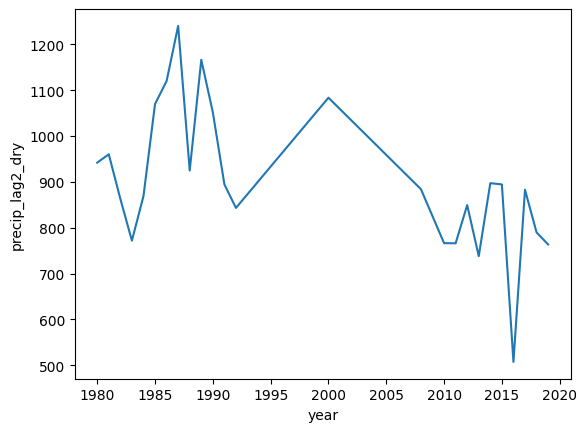

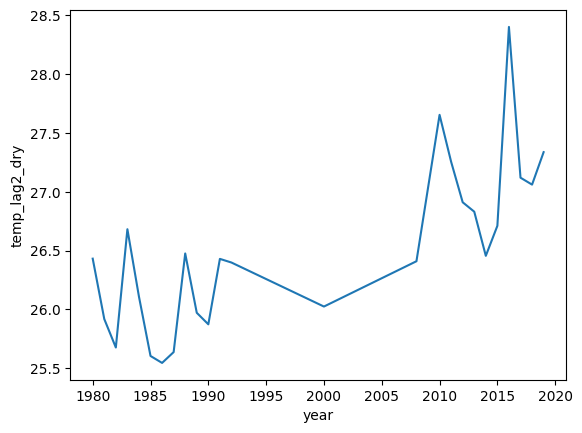

In [18]:
weather_groupby = processed_df.groupby(["year"], as_index = False).mean()

sns.lineplot(data = weather_groupby, x ="year", y ="precip_lag2_dry")
plt.show()

sns.lineplot(data = weather_groupby, x ="year", y ="temp_lag2_dry")
plt.show()

In order to adapt to the changing climate, the wing lengths increase while the masses of the birds decrease.